In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
startups =pd.read_csv('/content/sample_data/50_Startups.csv')

In [ ]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data=startups.rename({"R&D Spend":"rd","Administration":"adm","Marketing Spend":"mrkt"},axis=1)
data.head()

,rd,adm,mrkt,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data[data.duplicated()]

,rd,adm,mrkt,State,Profit


In [ ]:
data.describe()

,rd,adm,mrkt,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
data.corr()

,rd,adm,mrkt,Profit
rd,1.000000,0.241955,0.724248,0.972900
adm,0.241955,1.000000,-0.032154,0.200717
mrkt,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


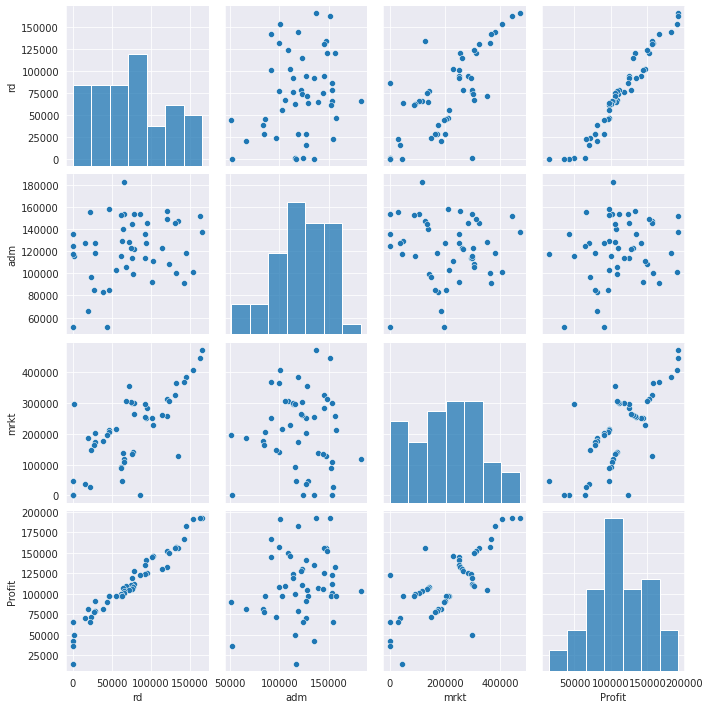

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [ ]:
model=smf.ols("Profit~rd+adm+mrkt",data=data).fit()

In [ ]:
model.params

Intercept    50122.192990
rd               0.805715
adm             -0.026816
mrkt             0.027228
dtype: float64

In [ ]:
print(model.tvalues,"\n",model.pvalues)

Intercept     7.626218
rd           17.846374
adm          -0.525507
mrkt          1.655077
dtype: float64 
 Intercept    1.057379e-09
rd           2.634968e-22
adm          6.017551e-01
mrkt         1.047168e-01
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [ ]:
mladm=smf.ols("Profit~adm",data=data).fit()
print(mladm.tvalues,"\n",mladm.pvalues)

Intercept    3.040044
adm          1.419493
dtype: float64 
 Intercept    0.003824
adm          0.162217
dtype: float64


In [ ]:
mlmrkt=smf.ols("Profit~mrkt",data=data).fit()
print(mlmrkt.tvalues,"\n",mlmrkt.pvalues)

Intercept    7.808356
mrkt         7.802657
dtype: float64 
 Intercept    4.294735e-10
mrkt         4.381073e-10
dtype: float64


In [ ]:
mlrd=smf.ols("Profit~adm+mrkt",data=data).fit()
print(mlrd.tvalues,"\n",mlrd.pvalues)

Intercept    1.142741
adm          2.467779
mrkt         8.281039
dtype: float64 
 Intercept    2.589341e-01
adm          1.729198e-02
mrkt         9.727245e-11
dtype: float64


In [ ]:
rsq_r=smf.ols("rd~adm+mrkt",data=data).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("adm~rd+mrkt",data=data).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("mrkt~rd+adm",data=data).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['rd','adm','mrkt'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,rd,2.468903
1,adm,1.175091
2,mrkt,2.326773


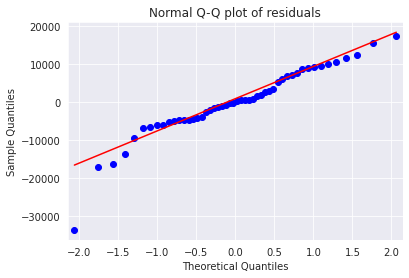

In [ ]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid<-30000))

[array([49])]

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

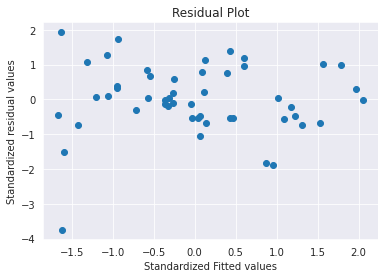

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

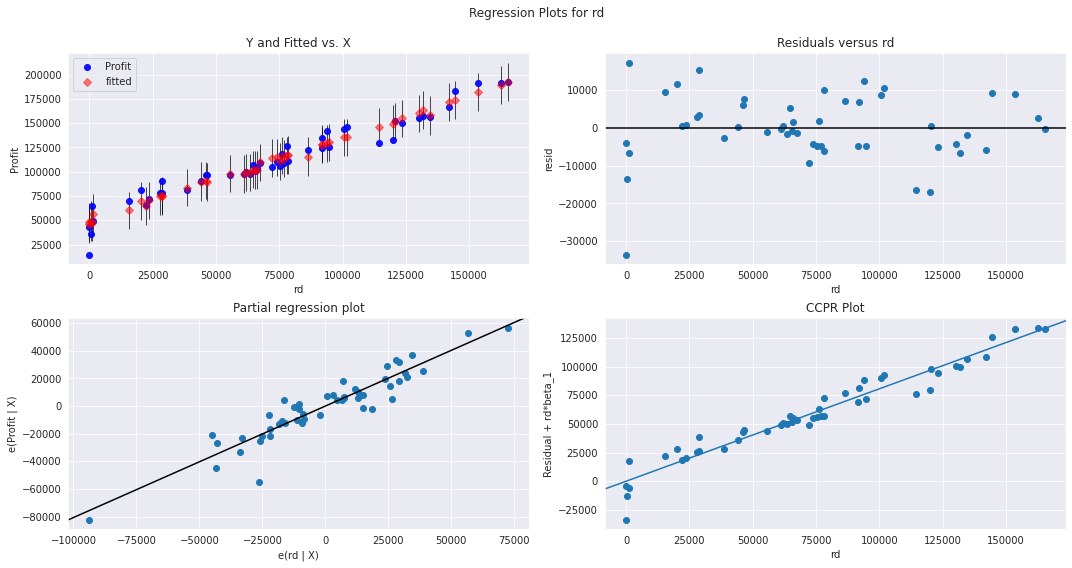

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "rd", fig=fig)
plt.show()

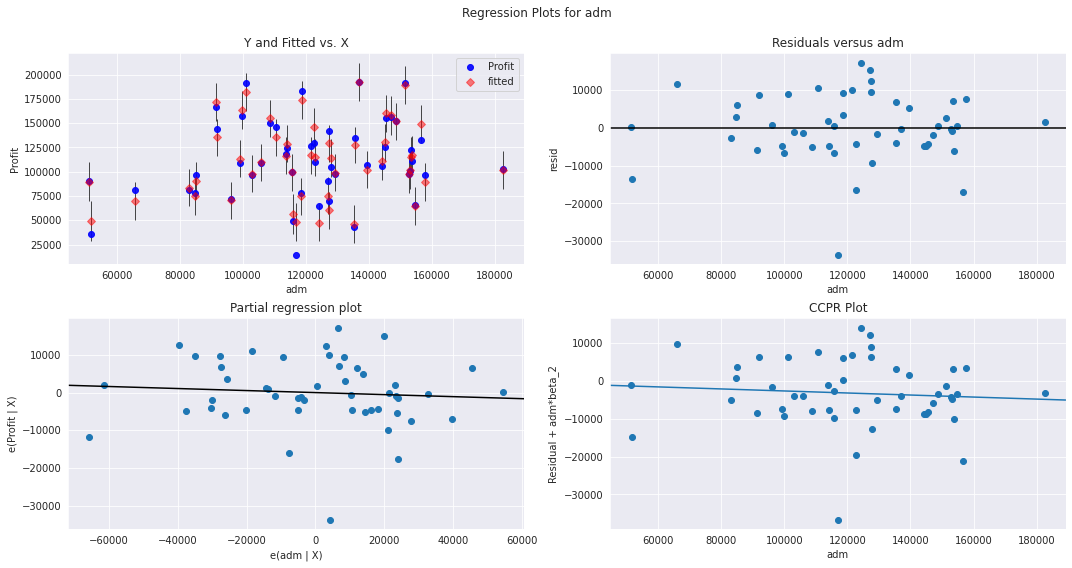

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "adm", fig=fig)
plt.show()

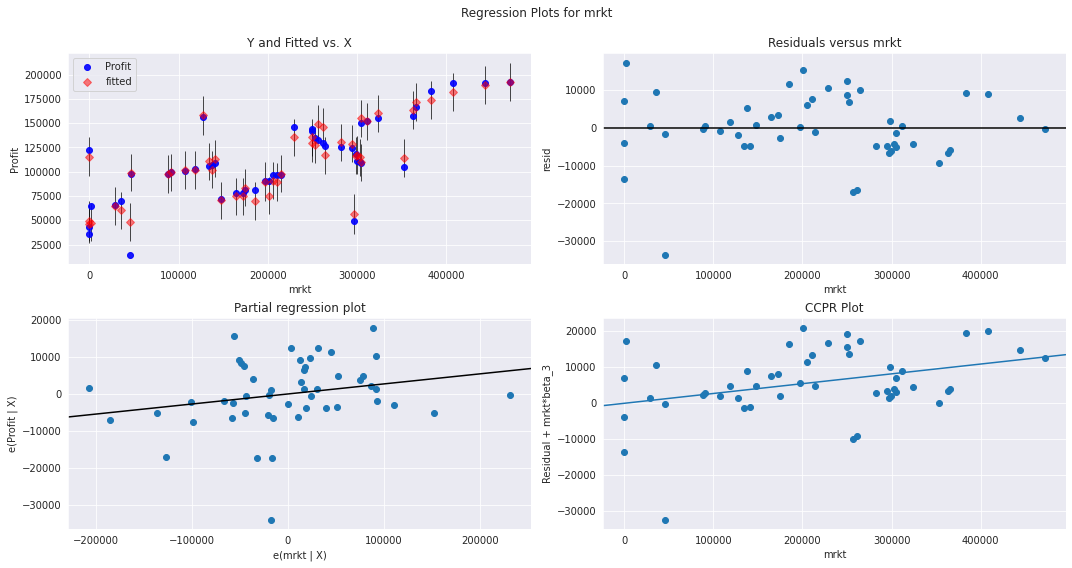

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "mrkt", fig=fig)
plt.show()

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


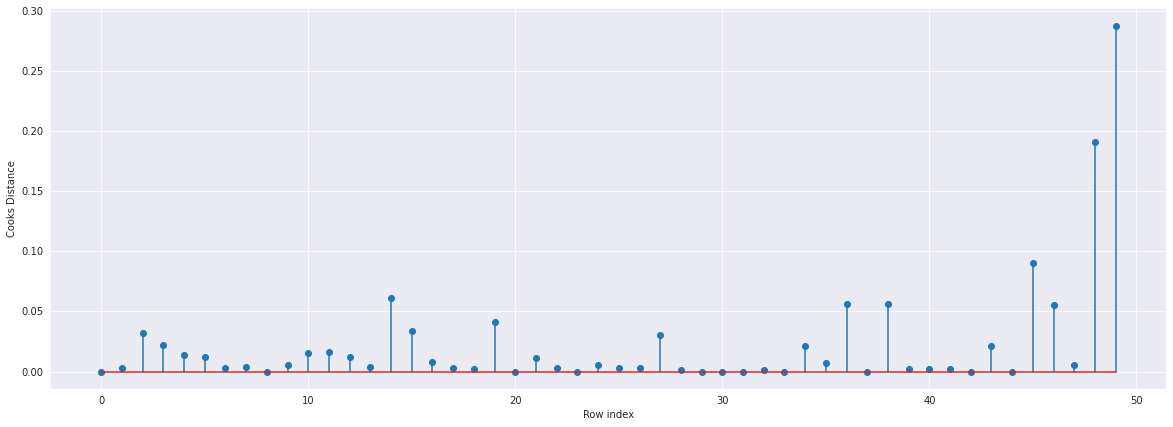

In [ ]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

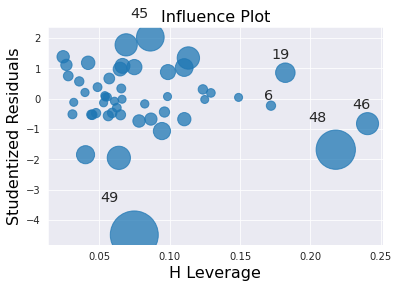

In [ ]:
influence_plot(model)
plt.show()

In [ ]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [ ]:
data[data.index.isin([49])]

,rd,adm,mrkt,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [ ]:
data=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data.head()

,rd,adm,mrkt,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
model2=smf.ols("Profit~rd+adm+mrkt",data=data).fit()

In [ ]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~rd+adm+mrkt",data=data).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data=data.drop(data.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data
    else:
        final_model=smf.ols("Profit~rd+adm+mrkt",data=data).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209413
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improve

In [ ]:
final_model.rsquared 

0.9882757054424702

In [ ]:
data

,rd,adm,mrkt,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


In [53]:
new_data=pd.DataFrame({'rd':100000,"adm":500000,"mrkt":140000},index=[0])
new_data

,rd,adm,mrkt
0,100000,500000,140000


In [54]:
final_model.predict(new_data)

0    136177.026541
dtype: float64

In [56]:
pred_y=final_model.predict(data)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [57]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276
